In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

dataset=pd.read_csv('order_train1.csv')
dataset.head()

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015-09-01,104,22069,307,403,offline,1114.0,19
1,2015-09-01,104,20028,301,405,offline,1012.0,12
2,2015-09-02,104,21183,307,403,online,428.0,109
3,2015-09-02,104,20448,308,404,online,962.0,3
4,2015-09-02,104,21565,307,403,offline,1400.0,3


In [15]:
dataset.describe()

,sales_region_code,item_code,first_cate_code,second_cate_code,item_price,ord_qty
count,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000,597694.000000
mean,102.903949,21008.015983,304.932094,406.457174,1076.241578,91.650505
std,1.504880,590.896347,2.004195,3.107329,1167.511104,199.843336
min,101.000000,20001.000000,301.000000,401.000000,1.000000,1.000000
25%,102.000000,20518.000000,303.000000,404.000000,598.000000,10.000000
50%,103.000000,20976.000000,306.000000,407.000000,883.000000,29.000000
75%,105.000000,21521.000000,306.000000,408.000000,1291.000000,101.000000
max,105.000000,22084.000000,308.000000,412.000000,260014.000000,16308.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597694 entries, 0 to 597693
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         597694 non-null  object 
 1   sales_region_code  597694 non-null  int64  
 2   item_code          597694 non-null  int64  
 3   first_cate_code    597694 non-null  int64  
 4   second_cate_code   597694 non-null  int64  
 5   sales_chan_name    597694 non-null  object 
 6   item_price         597694 non-null  float64
 7   ord_qty            597694 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 36.5+ MB


In [7]:
#统计表格中是否有空值
dataset.isnull().sum()

order_date           0
sales_region_code    0
item_code            0
first_cate_code      0
second_cate_code     0
sales_chan_name      0
item_price           0
ord_qty              0
dtype: int64

In [10]:
#产品的不同价格对需求量的影响(弱相关)
price=dataset['item_price']
order=dataset['ord_qty']
np.corrcoef(price,order)

array([[ 1.        , -0.12078224],
       [-0.12078224,  1.        ]])

<AxesSubplot:xlabel='item_price', ylabel='ord_qty'>

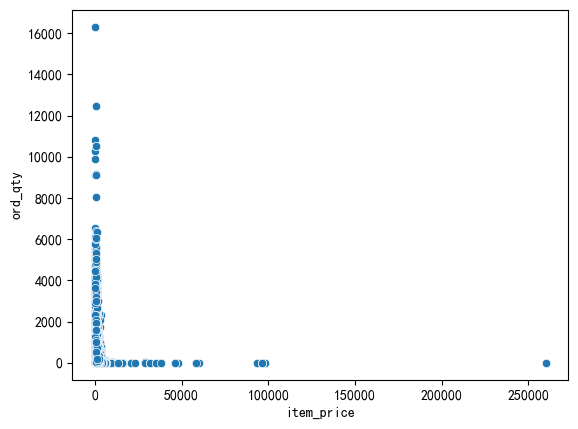

In [21]:
sns.scatterplot(x="item_price",y="ord_qty",data=dataset)

<AxesSubplot:>

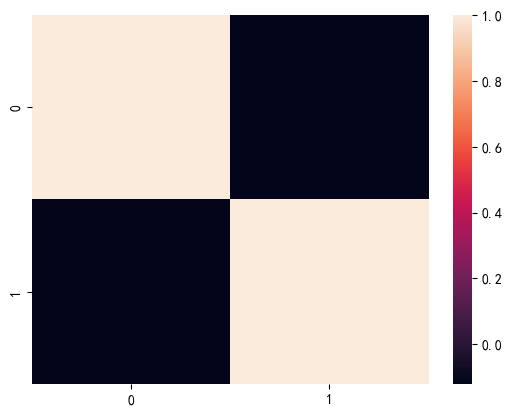

In [12]:
sns.heatmap(np.corrcoef(price,order))

<AxesSubplot:xlabel='sales_region_code', ylabel='ord_qty'>

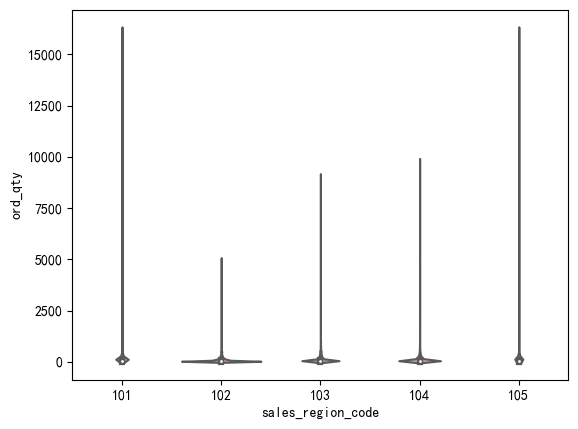

In [13]:
#产品所在区域对需求量的影响，以及不同区域的产品需求量有何特性
sns.violinplot(x="sales_region_code", y="ord_qty",
                    data=dataset, palette="Set2")

<AxesSubplot:xlabel='sales_chan_name', ylabel='ord_qty'>

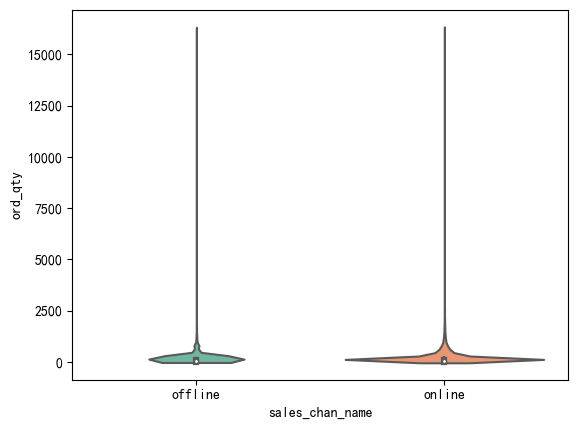

In [25]:
#不同销售方式（线上和线下）的产品需求量的特性
sns.violinplot(x="sales_chan_name", y="ord_qty",
                    data=dataset, palette="Set2")

<AxesSubplot:xlabel='first_cate_code', ylabel='ord_qty'>

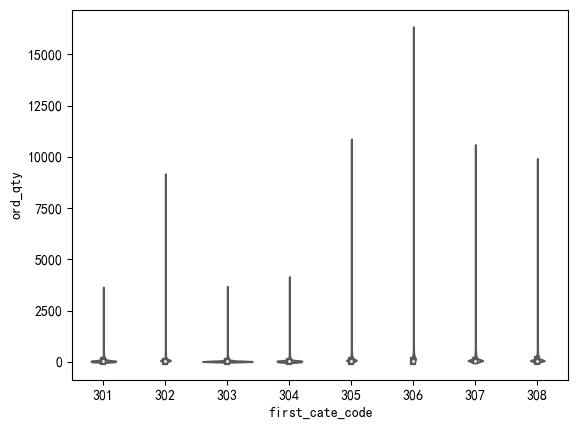

In [17]:
#不同品类之间的产品需求量有何不同点和共同点
sns.violinplot(x="first_cate_code", y="ord_qty",
                    data=dataset, palette="Set2")